In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df_xmatch = pd.read_csv('data/minijpas.xmatch_sdss_dr12.csv', comment='#')
df_xmatch

,angDist,TILE_ID,NUMBER,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,objID,mode,...,e_zph,avg_zph,pmRA,e_pmRA,pmDE,e_pmDE,SpObjID,spType,spCl,subClass
0,0.620795,2243,14,214.456298,52.691563,0.160,0.143,90.0,1237661385994731630,1,...,0.11424,0.34691,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,0.195417,2243,23,214.483009,52.675671,0.015,0.014,90.0,1237661385994731792,1,...,NaN,NaN,-18.5,5.4,7.2,5.4,0,NaN,NaN,NaN
2,0.085461,2243,36,214.607684,52.601935,0.168,0.162,0.0,1237661416065729326,1,...,0.04774,0.57158,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,1.171804,2243,107,214.374173,52.744610,0.379,0.332,0.0,1237661385994666180,1,...,0.08879,0.59513,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,0.093277,2243,120,214.465073,52.690884,0.103,0.095,90.0,1237661385994731628,1,...,0.07317,0.62198,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19902,0.403196,2406,12190,215.376209,53.468419,0.043,0.039,0.0,1237661387068539789,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19903,0.208520,2406,12191,215.746611,53.249540,0.137,0.117,90.0,1237661387068670830,1,...,0.10021,0.63945,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19904,0.152638,2406,12200,215.444890,53.427158,0.137,0.113,90.0,1237661387068539974,1,...,0.08223,0.69736,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19905,0.309366,2406,12201,215.505732,53.390856,0.076,0.075,90.0,1237661387068539882,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [23]:
df_xmatch.columns

Index(['angDist', 'TILE_ID', 'NUMBER', 'RAdeg', 'DEdeg', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'objID', 'mode', 'q_mode', 'class', 'SDSS12',
       'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag',
       'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp',
       'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE',
       'SpObjID', 'spType', 'spCl', 'subClass'],
      dtype='object')

<Axes: >

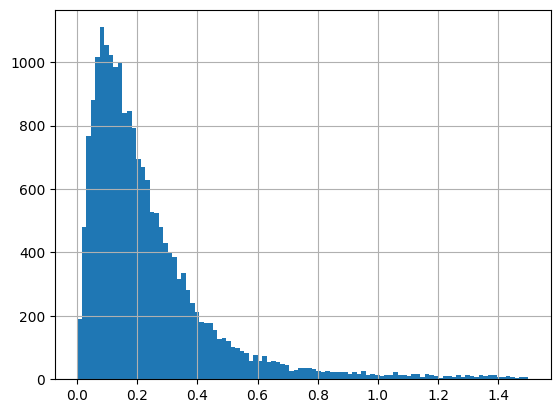

In [24]:
df_xmatch['angDist'].hist(bins=100)

In [25]:
cond_spec = df_xmatch['SpObjID'] != 0
cond_spec.sum()

np.int64(1169)

In [26]:
df_xmatch[cond_spec].value_counts(['spCl'])

spCl  
GALAXY    685
STAR      245
QSO       239
Name: count, dtype: int64

In [51]:
df_merged = pd.read_csv('data/merged2.csv')
df_merged.rename(columns={'objid' : 'objID'}, inplace=True)
df_common_objects = pd.merge(df_merged, df_xmatch, on='objID', how='inner')
df_common_objects[df_common_objects['SpObjID'] != 0].value_counts(['spCl'])
df_common_objects 
#len(df_common_object) = 11271 len(df_merged) = 11229

,objID,ra,dec,u,g,r,i,z,run,camcol,...,e_zph,avg_zph,pmRA,e_pmRA,pmDE,e_pmDE,SpObjID,spType,spCl,subClass
0,1237659120396009642,213.268077,52.116471,20.70730,20.38651,20.27203,20.22480,20.04869,3177,5,...,NaN,NaN,-1.4,5.6,10.2,5.6,8264198064786044928,RM_TILE1,QSO,BROADLINE
1,1237659120396009783,213.203442,52.128421,24.93485,22.53521,21.49035,20.82659,20.30259,3177,5,...,0.13899,0.51535,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,1237659120396140570,213.759266,52.055793,17.76128,16.59172,16.18532,16.04713,16.02548,3177,5,...,NaN,NaN,-16.9,2.7,-4.2,2.7,0,NaN,NaN,NaN
3,1237659120396140967,213.686459,52.010739,22.64963,21.84366,21.53168,21.22415,20.97393,3177,5,...,NaN,NaN,NaN,NaN,NaN,NaN,8263060344038684672,RM_TILE2,QSO,BROADLINE
4,1237659120932946121,213.651526,52.329250,20.89500,18.39217,17.11214,16.51913,16.20456,3177,6,...,NaN,NaN,0.1,3.1,-5.5,3.1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11266,1237661417139602408,215.786166,53.159142,21.70130,23.08870,21.91027,20.72726,20.93438,3712,3,...,0.08599,0.57406,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
11267,1237661417139601866,215.646435,53.094276,24.54577,22.84830,20.99624,20.11850,19.59448,3712,3,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
11268,1237661417139601850,215.627142,53.081659,22.64567,22.38203,21.32424,23.87182,23.40334,3712,3,...,-9999.00000,0.33604,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
11269,1237661417139601410,215.599772,53.166277,18.41347,17.48721,17.34359,17.33805,17.37105,3712,3,...,NaN,NaN,-0.7,2.7,-14.8,2.7,0,NaN,NaN,NaN


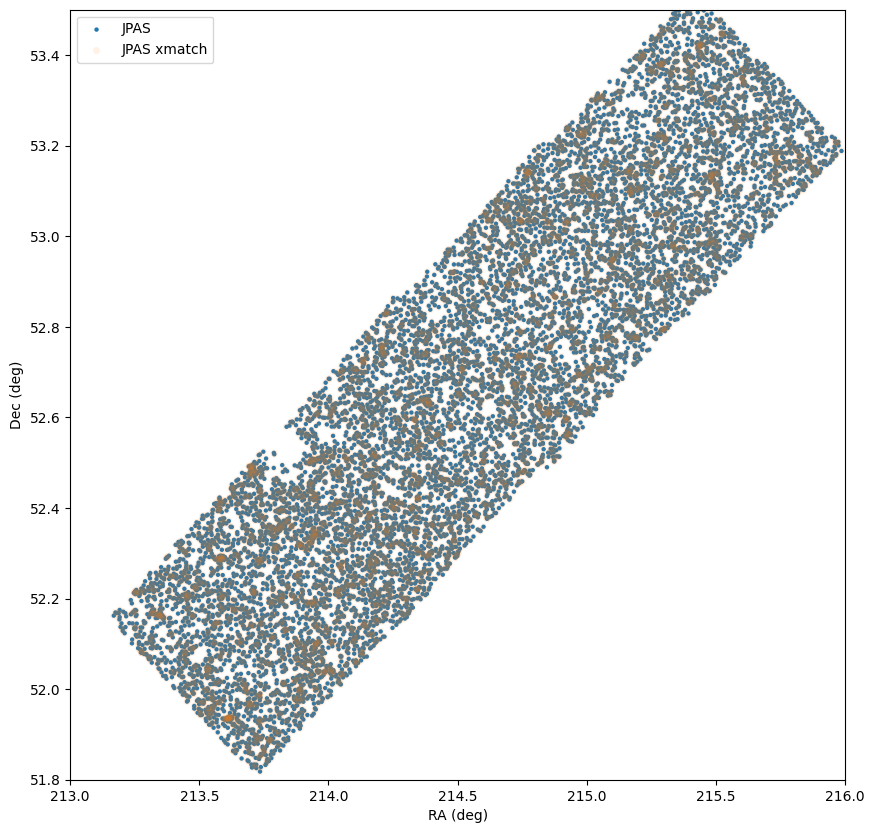

In [41]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_common_objects['ALPHA_J2000'], y=df_common_objects['DELTA_J2000'], s=10, 
            edgecolors='none', alpha=1.0, label='JPAS')
#plt.scatter(x=df_common_objects['ra'], y=df_common_objects['dec'], s=10,
#            edgecolors='none', alpha=0.5, label='SDSS')
plt.scatter(x=df_common_objects['RAdeg'], y=df_common_objects['DEdeg'], s=25,
            edgecolors='none', alpha=0.1, label='JPAS xmatch')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(213, 216)
plt.ylim(51.8, 53.5)
plt.legend()
plt.show()

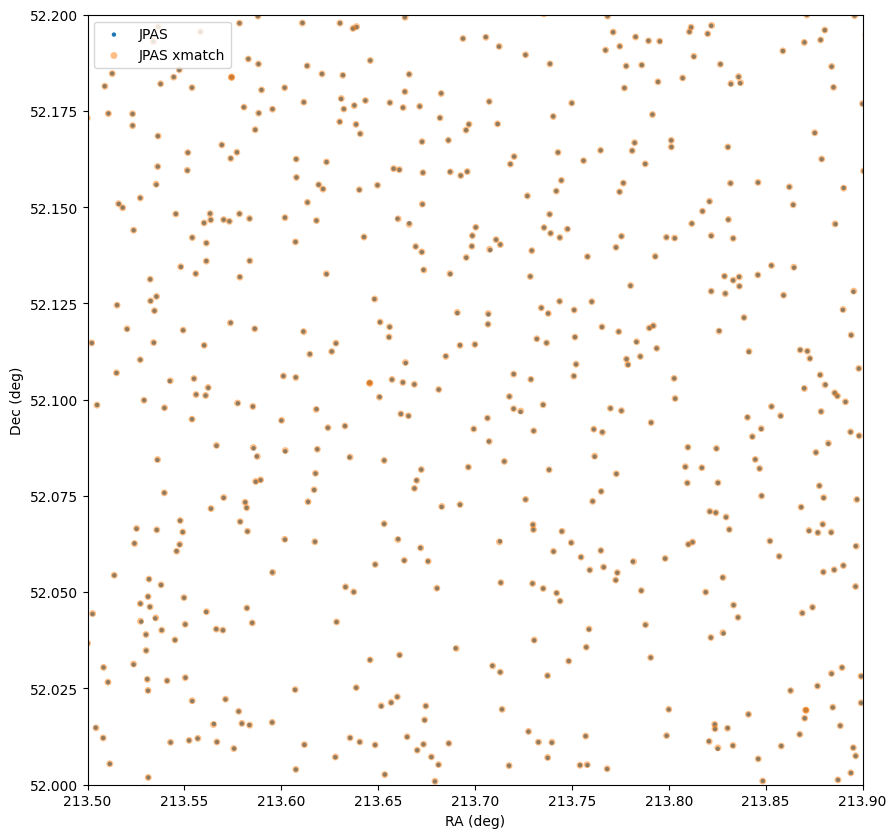

In [54]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_common_objects['ALPHA_J2000'], y=df_common_objects['DELTA_J2000'], s=10, 
            edgecolors='none', alpha=1.0, label='JPAS')
#plt.scatter(x=df_common_objects['ra'], y=df_common_objects['dec'], s=10,
#            edgecolors='none', alpha=0.5, label='SDSS')
plt.scatter(x=df_common_objects['RAdeg'], y=df_common_objects['DEdeg'], s=25,
            edgecolors='none', alpha=0.5, label='JPAS xmatch')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(213.5, 213.9)
plt.ylim(52, 52.2)
plt.legend()
plt.show()